In [31]:
import cv2, os
import albumentations as A
import matplotlib.pyplot as plt

In [32]:
def plot_image_and_histogram(img):
    
    # Converte de BGR para RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Calcula os histogramas para cada canal de cor
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(12, 6))

    # Plota a imagem
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Imagem')
    plt.axis('off')

    # Plota o histograma para cada canal
    plt.subplot(1, 2, 2)
    for i, color in enumerate(colors):
        histogram = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color)
    
    plt.title('Histograma')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Frequência')
    plt.legend(['Vermelho', 'Verde', 'Azul'])

    # Exibe os gráficos
    plt.tight_layout()
    plt.show()

In [33]:
def equalizar_histograma(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    clahe = cv2.createCLAHE(
        clipLimit=1.0, tileGridSize=(8,8))
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

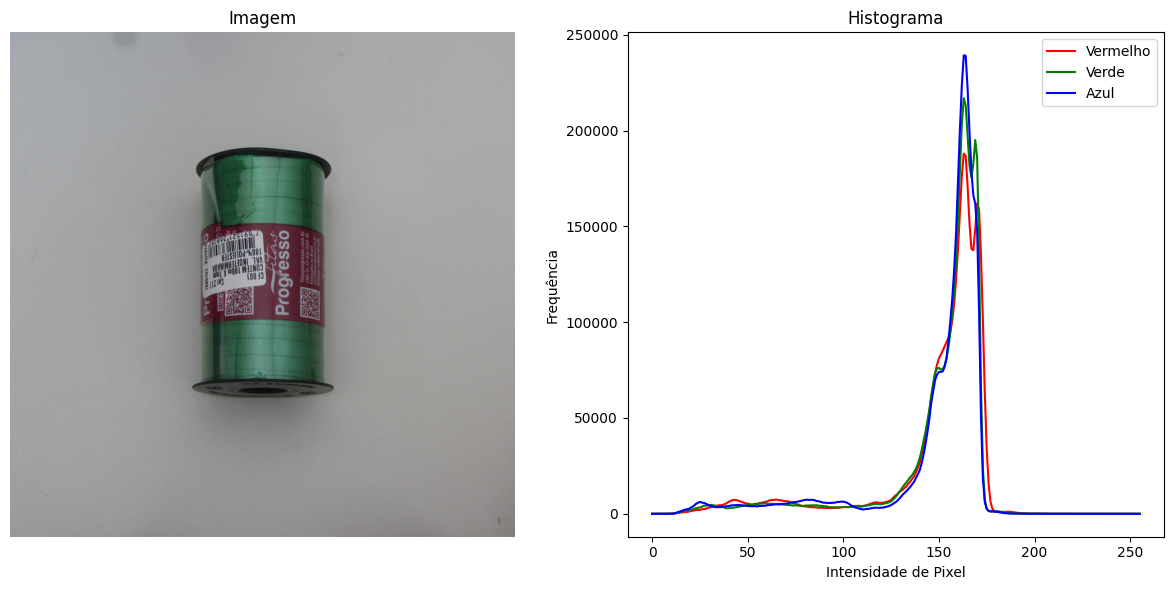

In [34]:
caminho = os.path.join('trims_dataset', 'ribbon', '5-01-V1-W.png')
foto = cv2.imread(caminho)
plot_image_and_histogram(foto)


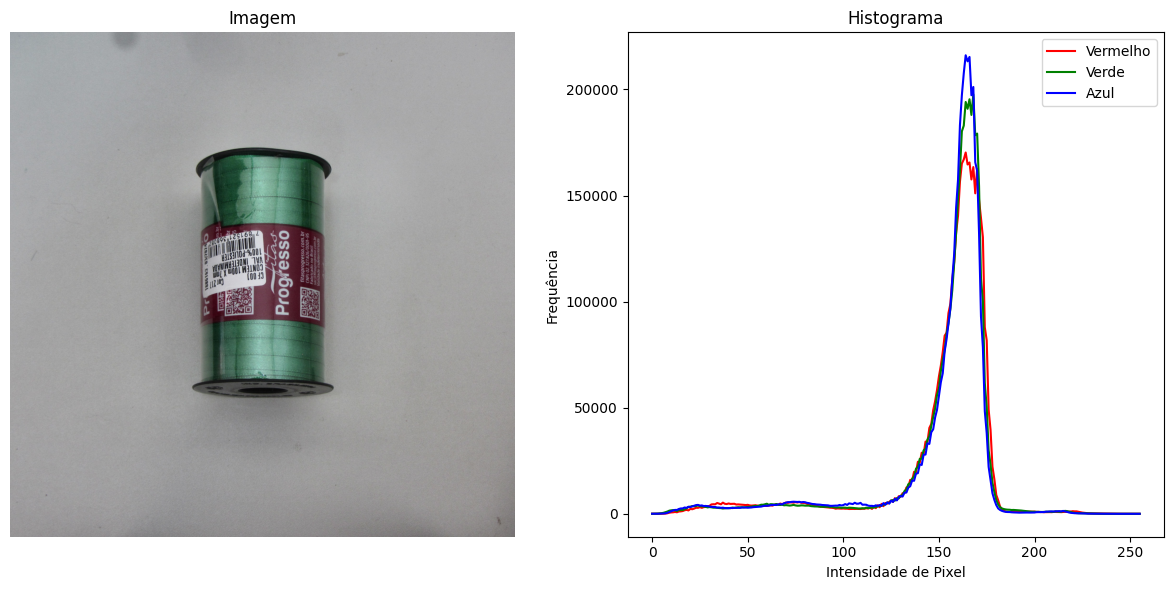

In [35]:
foto_normal = equalizar_histograma(foto)
#cv2.imwrite("fotonormalizada.png", foto_normal)
plot_image_and_histogram(foto_normal)